In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv('MajorAtlHurricaneMaster2016-2019.csv')
print(df.head(10))
df.replace('?',-99999, inplace=True)
df.drop(['OHC','LAND'], axis=1, inplace=True)
x = np.array(df.drop(['class'],axis=1)).astype("float32")
y = np.array(df['class']).astype("float32")
print(x[0],y[0])

    lat    lon  MaxWind  RMW  MIN_SLP  SHR_MAG  SHR_HDG  STM_SPD  STM_HDG  \
0  11.4  306.5       45   60     1006        5      324       12      275   
1  11.6  305.3       44   72     1003        5      350       15      270   
2  11.8  304.2       50   62     1002        4      323       13      279   
3  12.1  302.9       52  139     1002        4      268       11      290   
4  12.5  301.7       50   25     1002        6      243        9      283   
5  13.3  299.8       42   57     1006        3        8       13      293   
6  15.0  298.1       45   76     1005        3      320       14      296   
7  15.8  297.3       38   36     1005        7        2       13      288   
8  16.4  296.6       50  154     1004        7       31       12      310   
9  17.1  296.0       52   90     1002        6       76       14      314   

   SST   OHC  TPW  LAND  850TANG  850VORT  200DVRG  class  
0  278  9999   47   636       72       28      -18      0  
1  280  9999   47   617       71

In [55]:
import copy
random_label_copy = copy.copy(y)
print(random_label_copy[0:50])
np.random.shuffle(random_label_copy)
print(random_label_copy[0:50])
hits_array = np.array(y) == np.array(random_label_copy)
#print(hits_array)
print(hits_array.mean())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0.7783505154639175


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

2022-11-20 10:30:25.453605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2)
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)
validation_split = np.int(0.14*len(x1_train))
#print("validation split gives",validation_split)
x2_val = x1_train[:validation_split]
y2_val = y1_train[:validation_split]
x2_train = x1_train[validation_split:]
y2_train = y1_train[validation_split:]
#print(y2_train)
print(x2_train.shape,x2_val.shape,y2_train.shape,y2_val.shape)

model = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")])

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(x2_train,y2_train,epochs=50,batch_size=16,validation_data=(x2_val,y2_val))

(310, 14) (78, 14) (310,) (78,)
(267, 14) (43, 14) (267,) (43,)
Epoch 1/50


/tmp/ipykernel_12604/4078918124.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  validation_split = np.int(0.14*len(x1_train))


17/17 [==============================] - 1s 10ms/step - loss: 77.4310 - accuracy: 0.8764 - val_loss: 89.9086 - val_accuracy: 0.8140
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 49.4479 - accuracy: 0.8764 - val_loss: 54.1594 - val_accuracy: 0.8140
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 28.3137 - accuracy: 0.8727 - val_loss: 25.8224 - val_accuracy: 0.7907
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 15.2236 - accuracy: 0.7940 - val_loss: 17.5462 - val_accuracy: 0.7674
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 12.1530 - accuracy: 0.7715 - val_loss: 13.8093 - val_accuracy: 0.7442
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 10.3382 - accuracy: 0.7566 - val_loss: 15.5897 - val_accuracy: 0.8140
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 8.4906 - accuracy: 0.7940 - val_loss: 10.1282 - val_accuracy: 0.8140
Epoch 8/50
17/17 

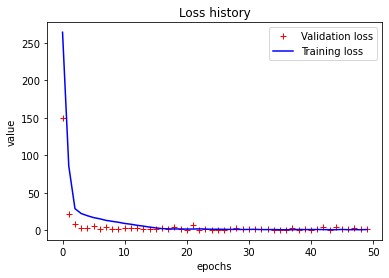

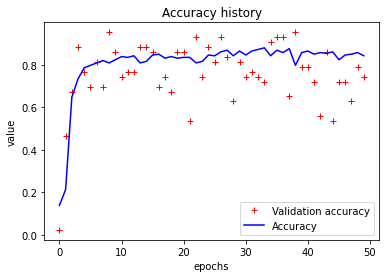

In [50]:
import matplotlib.pyplot as plt
#print(history.__dict__)
epochs = history.epoch
val_loss = history.history['val_loss']
loss = history.history['loss']
#print(loss)
plt.plot(epochs,val_loss,'r+',label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("value")
plt.title("Loss history")
plt.plot(epochs,loss,'b',label="Training loss")
plt.legend()
plt.show()

plt.clf()
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']
#print(loss)
plt.plot(epochs,val_accuracy,'r+',label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("value")
plt.title("Accuracy history")
plt.plot(epochs,accuracy,'b',label="Accuracy")
plt.legend()
plt.show()


In [58]:
results = model.evaluate(x1_test,y1_test)
print("Evalution results (loss,accuracy) for the test data is ",results)
single_fcst = model.predict(x1_test)
for i in range(len(single_fcst)):
    print(y1_test[i]," <---> RI Propbability: ",f"{float(single_fcst[i]):.5f}")


3/3 [==============================] - 0s 3ms/step - loss: 1.3454 - accuracy: 0.8718
Evalution results (loss,accuracy) for the test data is  [1.345353126525879, 0.8717948794364929]
3/3 [==============================] - 0s 2ms/step
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00025
0.0  <---> RI Propbability:  0.00005
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00224
1.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00022
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability:  0.00018
0.0  <---> RI Propbability:  0.00001
0.0  <---> RI Propbability:  0.00000
1.0  <---> RI Propbability:  0.00000
0.0  <---> RI Propbability: 